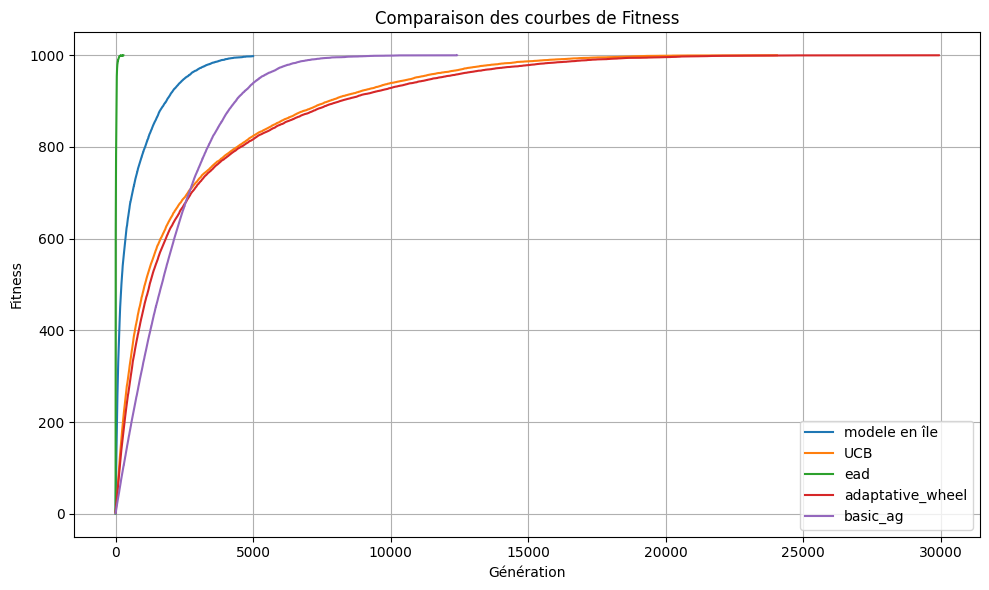

          Algorithm  Final Generation  Final nb_evals
0     modele en île              4999   400000.000000
1               UCB             24040    42419.400000
2               ead               283    28400.000000
3  adaptative_wheel             29926    46908.333333
4          basic_ag             12410    20640.400000


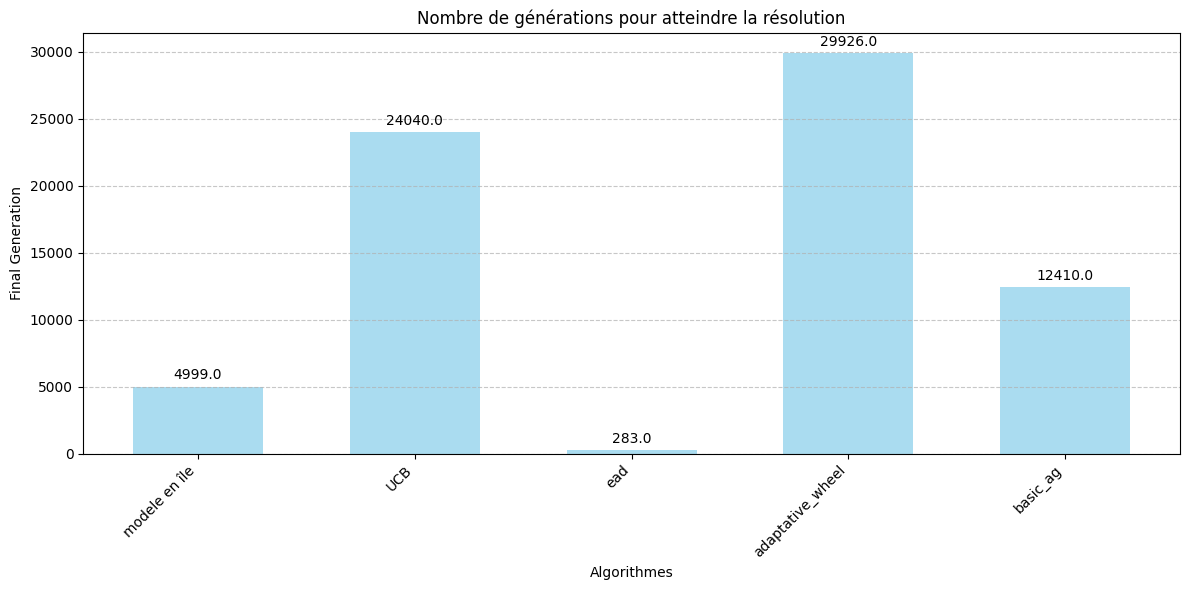

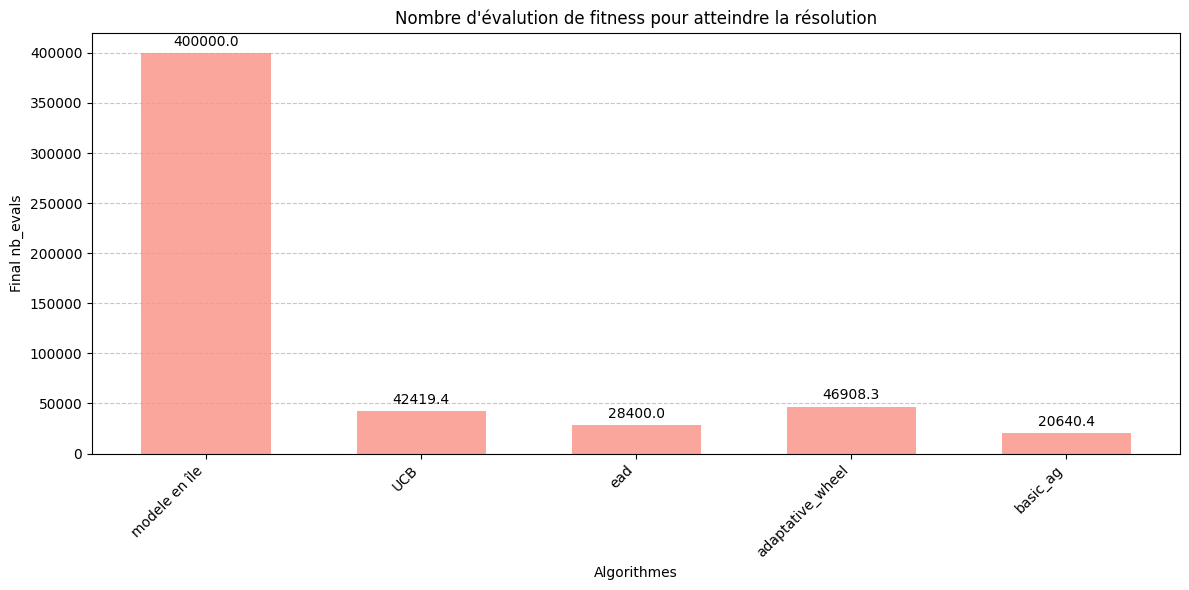

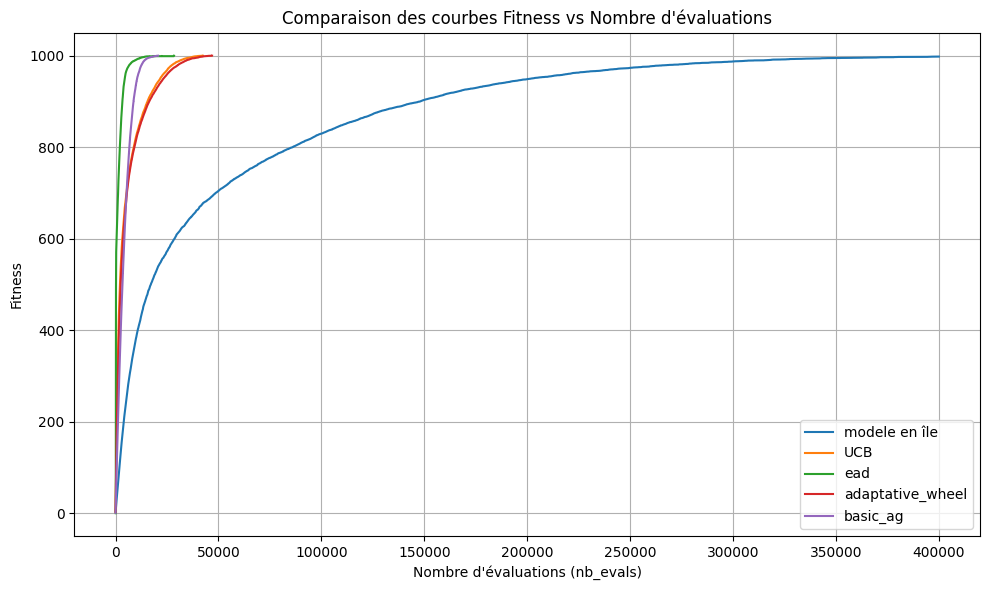

In [1]:
# Notebook pour comparer différents algorithmes via des courbes de Fitness et des histogrammes des dernières valeurs
import glob
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

def plot_csv_files(folder="csv"):
    """
    Parcourt tous les fichiers .csv dans 'folder' 
    et trace la courbe (generation, fitness) pour chacun.
    Le nom de la courbe correspond au nom du fichier sans .csv.
    """
    # Récupère la liste de tous les fichiers CSV dans le dossier donné
    csv_files = glob.glob(os.path.join(folder, "*.csv"))
    
    plt.figure(figsize=(10, 6))

    for csv_file in csv_files:
        # Récupère le nom du fichier sans le chemin
        filename = os.path.basename(csv_file)
        # Récupère le nom sans l'extension .csv
        curve_name = os.path.splitext(filename)[0]
        
        # Lecture du CSV
        df = pd.read_csv(csv_file)
        
        # Vérifie si les colonnes "generation" et "fitness" sont présentes
        if "generation" not in df.columns or "fitness" not in df.columns:
            print(f"Le fichier {filename} ne contient pas 'generation' ou 'fitness'. Ignoré.")
            continue
        
        # Trace la courbe generation -> fitness
        plt.plot(df["generation"], df["fitness"], label=curve_name)

    # Finalise la figure
    plt.xlabel("Génération")
    plt.ylabel("Fitness")
    plt.title("Comparaison des courbes de Fitness")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

def extract_final_metrics(folder="csv"):
    """
    Parcourt tous les fichiers .csv dans 'folder' et extrait les dernières valeurs de 'generation' et 'nb_evals'.
    
    Parameters:
        folder (str): Dossier contenant les fichiers CSV.
        
    Returns:
        pd.DataFrame: DataFrame contenant les dernières valeurs de 'generation' et 'nb_evals' pour chaque algorithme.
    """
    # Liste pour stocker les données
    data = {
        "Algorithm": [],
        "Final Generation": [],
        "Final nb_evals": []
    }
    
    # Récupère la liste de tous les fichiers CSV dans le dossier donné
    csv_files = glob.glob(os.path.join(folder, "*.csv"))
    
    for csv_file in csv_files:
        # Récupère le nom du fichier sans le chemin
        filename = os.path.basename(csv_file)
        # Récupère le nom sans l'extension .csv
        algo_name = os.path.splitext(filename)[0]
        
        # Lecture du CSV
        df = pd.read_csv(csv_file)
        
        # Vérifie si les colonnes nécessaires sont présentes
        if "generation" not in df.columns or "nb_evals" not in df.columns:
            print(f"Le fichier {filename} ne contient pas 'generation' ou 'nb_evals'. Ignoré.")
            continue
        
        # Extrait les dernières valeurs
        final_generation = df["generation"].iloc[-1]
        final_nb_eval = df["nb_evals"].iloc[-1]
        
        # Ajoute les données au dictionnaire
        data["Algorithm"].append(algo_name)
        data["Final Generation"].append(final_generation)
        data["Final nb_evals"].append(final_nb_eval)
    
    # Convertit le dictionnaire en DataFrame
    metrics_df = pd.DataFrame(data)
    return metrics_df

def plot_final_metrics(metrics_df):
    """
    Trace deux histogrammes séparés pour les dernières valeurs de 'generation' et 'nb_evals' pour chaque algorithme.
    
    Parameters:
        metrics_df (pd.DataFrame): DataFrame contenant les dernières valeurs de 'generation' et 'nb_evals' pour chaque algorithme.
    """
    if metrics_df.empty:
        print("Aucune donnée à afficher.")
        return
    
    # --- Histogramme pour 'Final Generation' ---
    plt.figure(figsize=(12, 6))
    bars1 = plt.bar(metrics_df["Algorithm"], metrics_df["Final Generation"], 
                    width=0.6, alpha=0.7, color='skyblue')
    
    # Ajouter des annotations pour les valeurs
    for bar in bars1:
        height = bar.get_height()
        plt.annotate(f'{height:.1f}',
                     xy=(bar.get_x() + bar.get_width() / 2, height),
                     xytext=(0, 3),  # Déplacement de 3 points vers le haut
                     textcoords="offset points",
                     ha='center', va='bottom')
    
    plt.xlabel('Algorithmes')
    plt.ylabel('Final Generation')
    plt.title('Nombre de générations pour atteindre la résolution')
    plt.xticks(rotation=45, ha='right')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()
    
    # --- Histogramme pour 'Final nb_evals' ---
    plt.figure(figsize=(12, 6))
    bars2 = plt.bar(metrics_df["Algorithm"], metrics_df["Final nb_evals"], 
                    width=0.6, alpha=0.7, color='salmon')
    
    # Ajouter des annotations pour les valeurs
    for bar in bars2:
        height = bar.get_height()
        plt.annotate(f'{height:.1f}',
                     xy=(bar.get_x() + bar.get_width() / 2, height),
                     xytext=(0, 3),  # Déplacement de 3 points vers le haut
                     textcoords="offset points",
                     ha='center', va='bottom')
    
    plt.xlabel('Algorithmes')
    plt.ylabel('Final nb_evals')
    plt.title('Nombre d\'évalution de fitness pour atteindre la résolution')
    plt.xticks(rotation=45, ha='right')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()
    
def plot_fitness_vs_nb_evals(folder="csv"):
    """
    Parcourt tous les fichiers .csv dans 'folder' 
    et trace la courbe (nb_evals, fitness) pour chacun.
    Le nom de la courbe correspond au nom du fichier sans .csv.
    """
    csv_files = glob.glob(os.path.join(folder, "*.csv"))
    
    plt.figure(figsize=(10, 6))
    
    for csv_file in csv_files:
        filename = os.path.basename(csv_file)
        curve_name = os.path.splitext(filename)[0]
        
        # Lecture du CSV
        df = pd.read_csv(csv_file)
        
        # Vérifie si les colonnes "nb_evals" et "fitness" sont présentes
        if "nb_evals" not in df.columns or "fitness" not in df.columns:
            print(f"Le fichier {filename} ne contient pas 'nb_evals' ou 'fitness'. Ignoré.")
            continue
        
        # Trace la courbe nb_evals -> fitness
        plt.plot(df["nb_evals"], df["fitness"], label=curve_name)
    
    # Personnalisation de la figure
    plt.xlabel("Nombre d'évaluations (nb_evals)")
    plt.ylabel("Fitness")
    plt.title("Comparaison des courbes Fitness vs Nombre d'évaluations")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


if __name__ == "__main__":
    # 1. Tracer les courbes de fitness selon les générations
    plot_csv_files(folder="csv")
    
    # 2. Extraire les dernières valeurs de 'generation' et 'nb_evals'
    metrics_df = extract_final_metrics(folder="csv")
    print(metrics_df)
    
    # 3. Tracer les histogrammes des dernières valeurs
    plot_final_metrics(metrics_df)
    
    # 4. Tracer les courbes Fitness vs Nombre d'évaluations
    plot_fitness_vs_nb_evals(folder="csv")
